In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os

# Step 1: Load and preprocess the Excel data
hsi_df = pd.read_excel(os.path.join("dataset", "HSI_min_20250201-20250430.xlsx"),
                   index_col="index")
hsi_df['datetime'] = pd.to_datetime(hsi_df['date'] + ' ' + hsi_df['time'])
hsi_df = hsi_df.set_index('datetime')
hsi_df.head()

,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-03 09:30:00,2025-02-03,2025-02-03,09:30:00,20048.87,20048.87,20048.87,20048.87,210367186
2025-02-03 09:31:00,2025-02-03,2025-02-03,09:31:00,20040.03,20125.38,20040.03,20125.38,233333295
2025-02-03 09:32:00,2025-02-03,2025-02-03,09:32:00,20120.99,20129.47,20098.00,20098.00,85137616
2025-02-03 09:33:00,2025-02-03,2025-02-03,09:33:00,20097.95,20097.95,19996.73,20040.94,101702443
2025-02-03 09:34:00,2025-02-03,2025-02-03,09:34:00,20039.30,20039.30,20005.90,20014.28,66246961


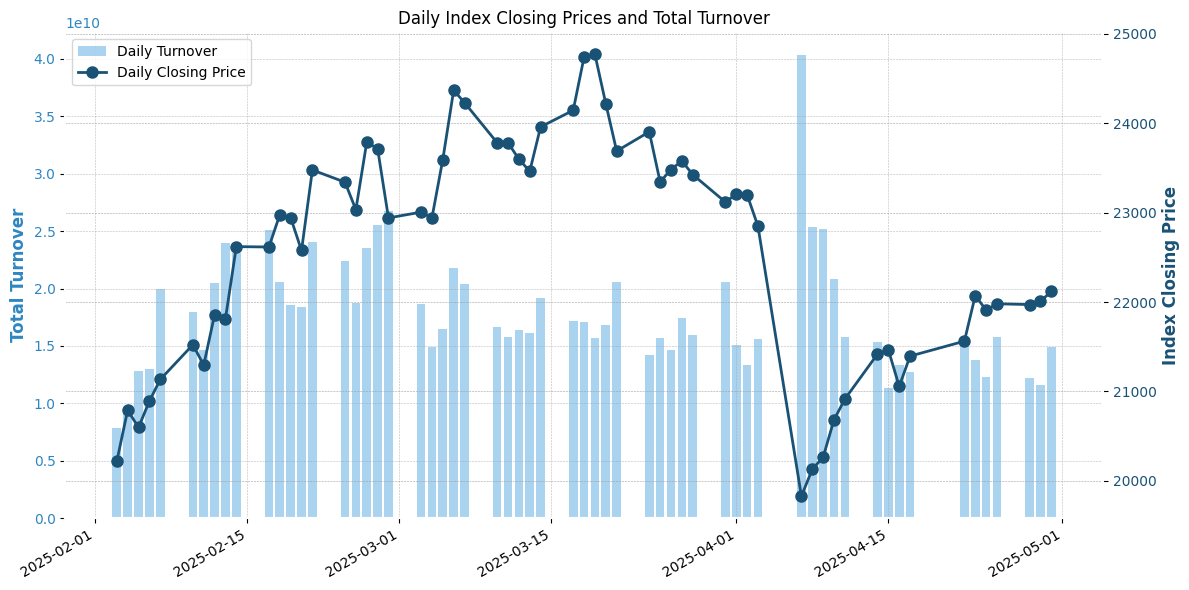

In [ ]:
# Resample to daily frequency
daily_hsi_df = hsi_df.resample('D').agg({
    'close': 'last',        # Take last closing price of the day
    'turnover': 'sum'       # Sum all intra-day turnover
}).dropna()

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create secondary axis for turnover
ax1.bar(daily_hsi_df.index, daily_hsi_df['turnover'], 
        color='#85c1e9', 
        alpha=0.7,
        width=0.8,  # Width in days (0.8 = 80% of day interval)
        label='Daily Turnover')
ax1.set_ylabel('Total Turnover', color='#2e86c1')
ax1.tick_params(axis='y', labelcolor='#2e86c1')

# Plot daily closing prices (deep blue line)
ax2 = ax1.twinx()
ax2.plot(daily_hsi_df.index, daily_hsi_df['close'], 
         color='#1a5276', 
         marker='o',
         linewidth=2,
         markersize=8,
         label='Daily Closing Price')
ax2.set_ylabel('Index Closing Price', color='#1a5276')
ax2.tick_params(axis='y', labelcolor='#1a5276')

# Formatting
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Daily Index Closing Prices and Total Turnover')
ax1.grid(True, linestyle='--', alpha=0.7)
fig.autofmt_xdate()

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()